<h1> Mall Customers Segmentation</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
df.columns = ['customer_id', 'gender','age','annual_income','spending_score']
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


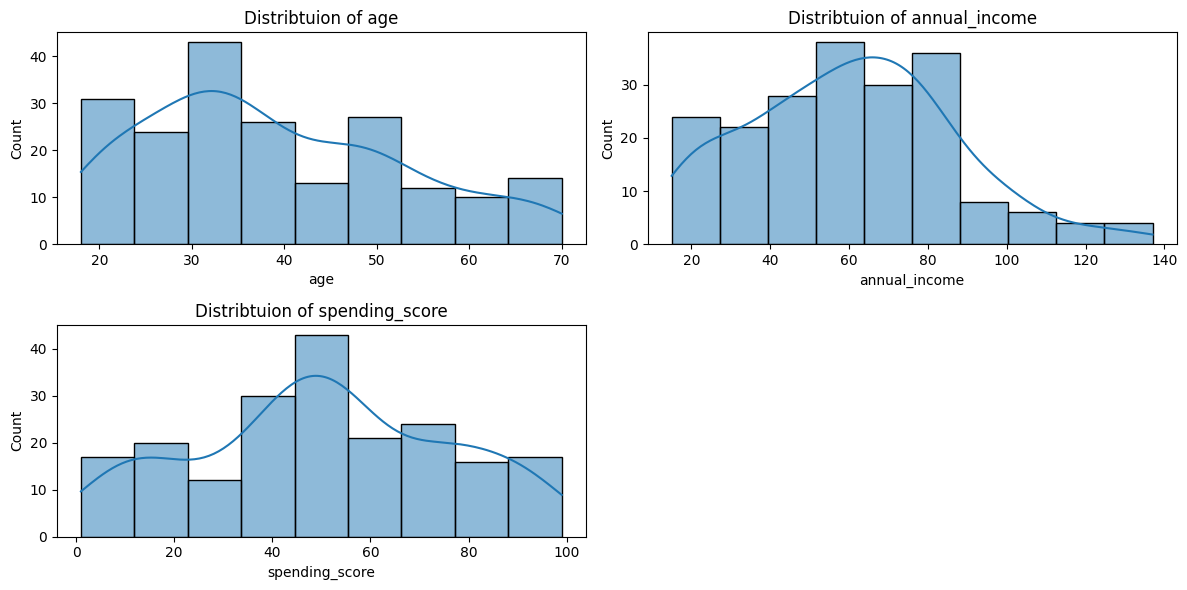

In [13]:
numerical_cols = ['age', 'annual_income', 'spending_score']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
  plt.subplot(2,2,i)
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribtuion of {col}")
plt.tight_layout()
plt.show()

<h1>Dari tiga grafik: </h1>

- Pelanggan didominasi usia 25–40

- Kelas menengah paling banyak

- Spending terbagi dua kelompok besar

<h2> Insight : </h2>

<h3>Mall memiliki dua tipe pelanggan utama</h3>

- Datang sering tapi belanja kecil

- Datang sedikit tapi belanja besar

<h3>Segmentation marketing tepat digunakan</h3>

- Loyalty untuk high spender

- Promo untuk low spender




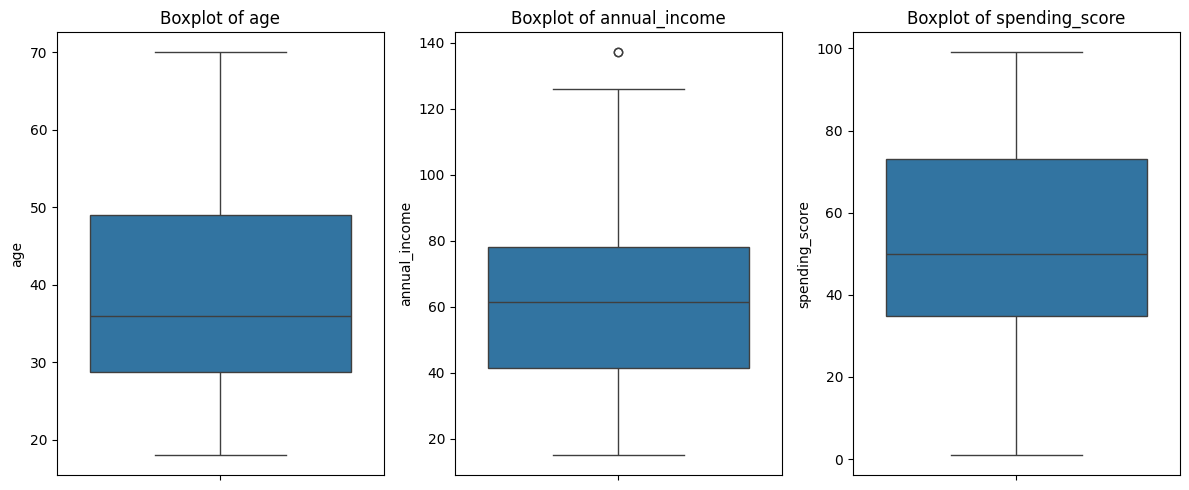

In [20]:
plt.figure(figsize=(12,5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1,3,i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


Insight (Age):

- Mayoritas pelanggan berusia sekitar 30–40 tahun

- Rentang usia pelanggan cukup lebar (remaja hingga lansia)

- Tidak ada usia ekstrem yang sangat aneh

- Program marketing bisa dibuat multigenerasi, namun fokus usia produktif

Insight (Income):

- Mayoritas pendapatan pelanggan berada di sekitar middle-income

- Ada sedikit pelanggan high-income sebagai outlier

- Peluang strategi premium khusus segmen kecil kaya

- Namun mayoritas tetap mid-market

Insight (Spending):

- Perilaku belanja pelanggan sangat beragam

- Ada pelanggan yang hampir tidak belanja sama sekali dan yang sangat aktif

- Ini cocok untuk clustering customer segmentation
(low spender vs high spender)

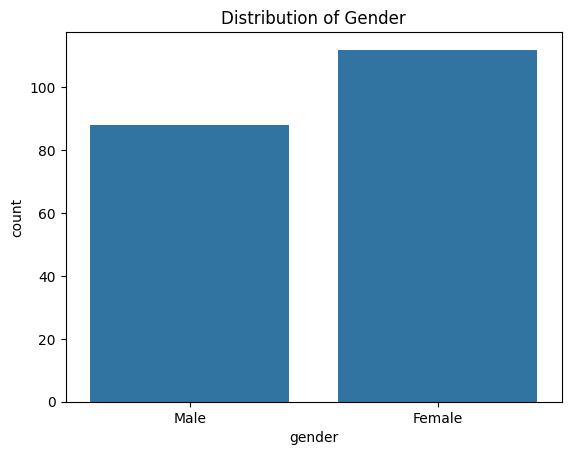

,proportion
gender,
Female,0.56
Male,0.44


In [33]:
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')
plt.show()
df['gender'].value_counts(normalize=True)

- Pada dataset ini, jumlah pelanggan perempuan sedikit lebih banyak dibandingkan pelanggan laki-laki. Hal ini menunjukkan bahwa segmen perempuan merupakan pasar yang signifikan bagi mall. Oleh karena itu, mall dapat mempertimbangkan untuk menambah variasi produk yang banyak diminati perempuan, seperti produk kecantikan dan lifestyle.

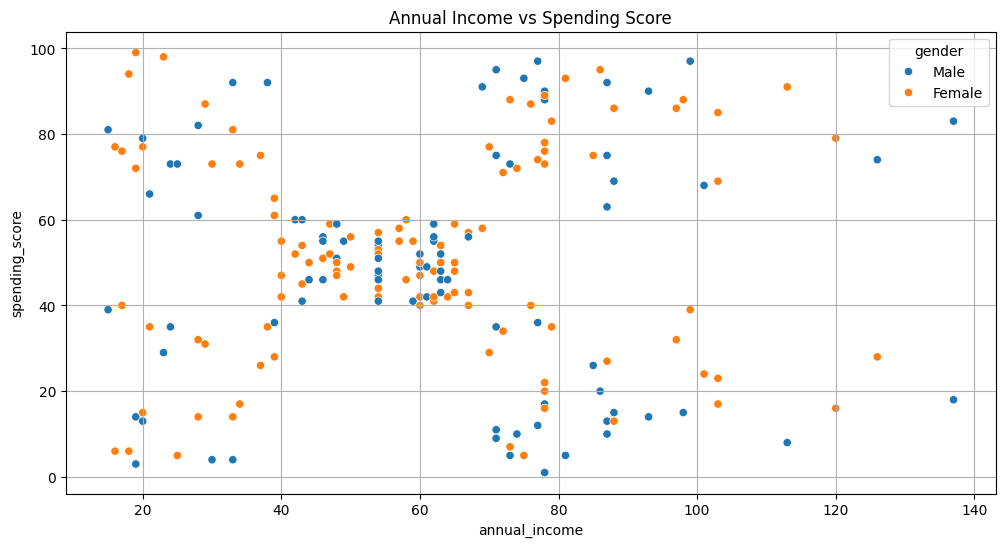

,annual_income,spending_score
annual_income,1.000000,0.009903
spending_score,0.009903,1.000000


In [30]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='annual_income', y='spending_score',data=df, hue='gender')
plt.title('Annual Income vs Spending Score')
plt.grid()
plt.show()
df[['annual_income','spending_score']].corr()


- Berdasarkan distribusi, pelanggan berpendapatan sangat tinggi jumlahnya sedikit. Selain itu, spending score yang tinggi tidak selalu dimiliki oleh pelanggan berpendapatan tinggi, sehingga pelanggan berpenghasilan tinggi tidak otomatis menjadi high spender.
- Mayoritas pelanggan berada pada kelompok pendapatan menengah (sekitar 40–70 ribu), dan mereka memiliki spending score moderat (40–60). Ini menunjukkan bahwa segmen dengan pendapatan menengah merupakan basis pelanggan terbesar mall dengan pola belanja yang stabil.
- Pada dataset ini, pelanggan dengan pendapatan tinggi relatif sedikit, sehingga belum cukup bukti untuk menyimpulkan pola belanja kelompok berpendapatan tinggi secara umum.
- Karena pelanggan dengan pendapatan menengah merupakan kelompok terbesar dan memiliki spending score moderat, strategi promo seperti diskon, bundling, atau loyalty program berpotensi efektif untuk meningkatkan pengeluaran pada segmen ini.

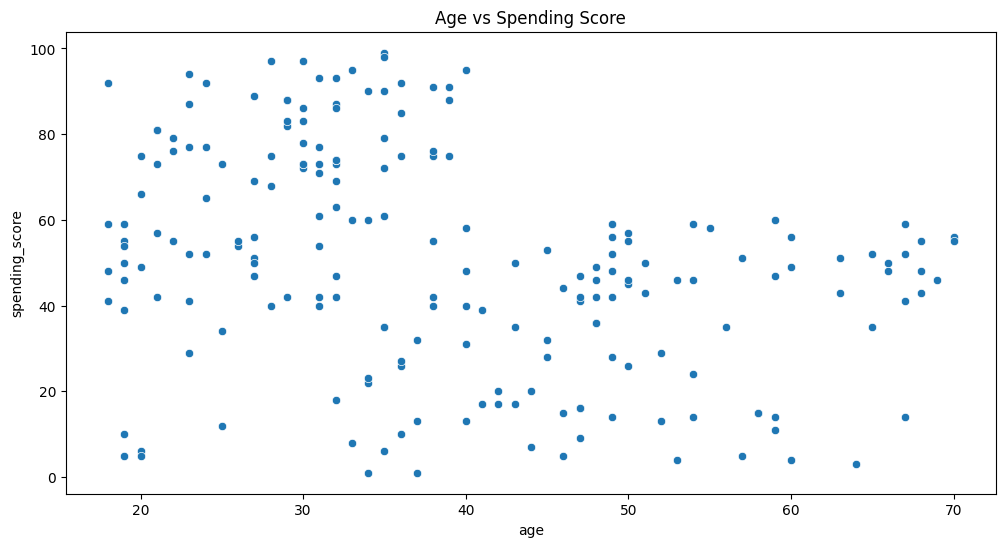

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='age', y='spending_score',data=df)
plt.title('Age vs Spending Score')
plt.show()

- Pelanggan berusia 20–40 tahun cenderung memiliki spending score yang lebih tinggi dan lebih bervariasi dibandingkan kelompok usia lainnya. Hal ini menunjukkan bahwa segmen usia ini merupakan target pasar utama, sehingga mall dapat memfokuskan produk dan promosi pada kategori yang relevan dengan kebutuhan usia muda–dewasa awal.
- Pelanggan berusia di atas 45 tahun cenderung memiliki spending score yang berada pada kisaran menengah (sekitar 40–60) dan relatif jarang yang memiliki spending score tinggi. Segmen ini terlihat lebih berhati-hati dalam berbelanja sehingga strategi yang sesuai misalnya program bundling, paket keluarga, atau promosi berbasis nilai (value-based offering).
- Program diskon dan kampanye promosi dapat difokuskan pada kelompok usia 20–40 tahun karena kelompok ini menunjukkan kecenderungan belanja yang lebih tinggi dan responsivitas yang lebih besar terhadap aktivitas pemasaran.


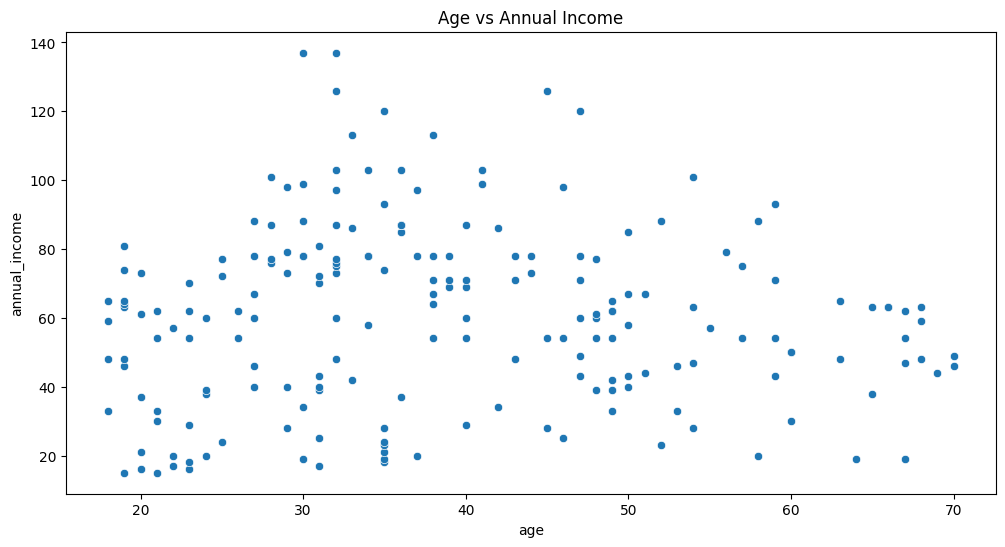

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='age', y='annual_income',data=df)
plt.title('Age vs Annual Income')
plt.show()

- Pelanggan berusia 20–40 tahun memiliki variasi pendapatan yang cukup lebar, mulai dari pendapatan rendah hingga tinggi. Bahkan beberapa pelanggan dengan pendapatan tertinggi berada pada kelompok usia ini, yang menunjukkan bahwa usia muda tidak selalu identik dengan pendapatan rendah.
- Tidak terdapat indikasi bahwa pelanggan berusia di atas 45 tahun selalu memiliki pendapatan lebih tinggi dibandingkan kelompok usia 20–40 tahun. Hal ini konsisten dengan temuan spending score dimana kelompok usia lebih tua cenderung memiliki perilaku belanja yang lebih konservatif. Program promosi berbasis diskon atau value-for-money diperkirakan lebih efektif untuk segmen usia ini.

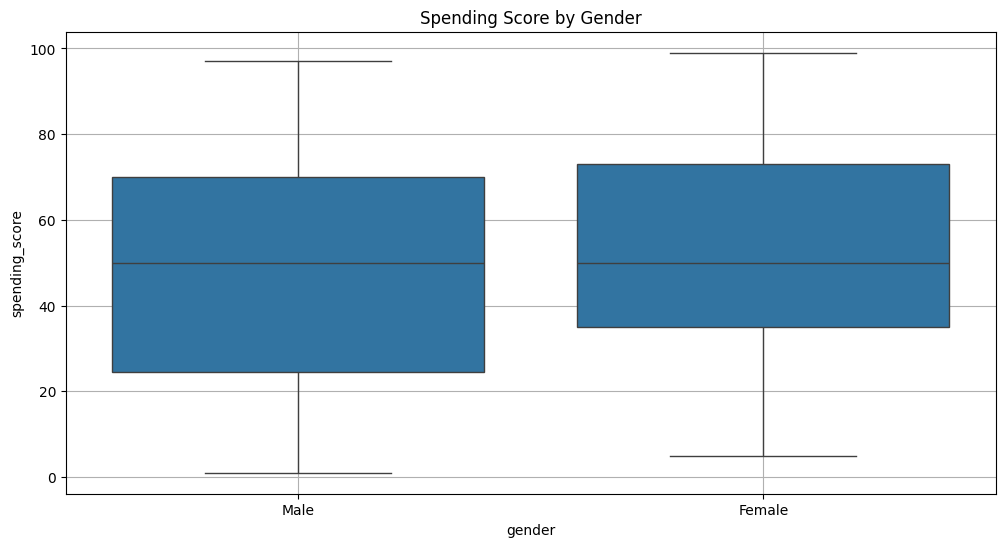

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x='gender', y='spending_score', data= df)
plt.title('Spending Score by Gender')
plt.grid()
plt.show()

- Jumlah pelanggan perempuan sedikit lebih banyak dibandingkan laki-laki, sehingga segmen perempuan merupakan target pasar penting bagi mall.

- Median spending score laki-laki dan perempuan relatif sama, sehingga tidak terdapat perbedaan besar pada tingkat belanja rata-rata antar gender.

- Variasi spending score laki-laki lebih besar, menunjukkan adanya kelompok laki-laki dengan spending yang sangat rendah dan sangat tinggi.

- Spending score perempuan cenderung lebih konsisten, sehingga strategi promosi pada segmen perempuan dapat lebih mudah diprediksi.

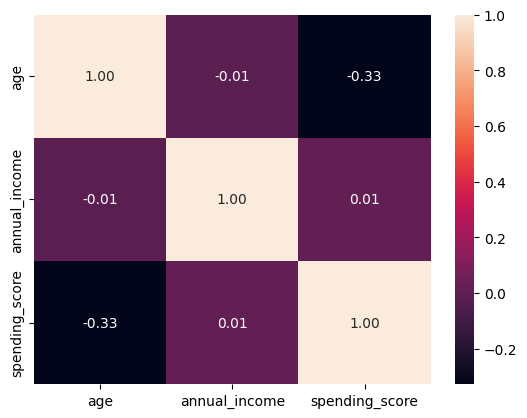

In [37]:
corr = df [numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

- Korelasi tertinggi terdapat antara annual income dan spending score, yaitu sekitar 0.01.
Nilai ini sangat dekat dengan 0, sehingga dapat disimpulkan bahwa penghasilan hampir tidak berkaitan dengan seberapa besar pelanggan berbelanja.
- Korelasi terendah terdapat antara age dan spending score, yaitu sekitar −0.33.
Nilai negatif menunjukkan bahwa semakin tua usia, rata-rata spending score menurun.


Secara keseluruhan, income bukan pendorong utama perilaku belanja di mall, tetapi usia berperan lebih besar.
Strategi promosi sebaiknya difokuskan pada segmen usia 20–40 tahun yang menunjukkan minat belanja lebih tinggi.

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = df[['age', 'annual_income', 'spending_score']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


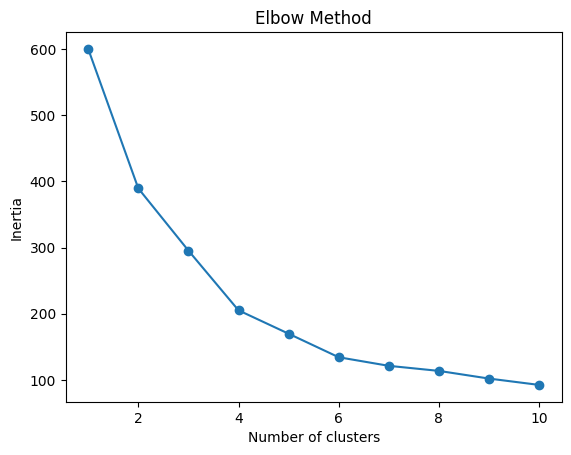

In [42]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [43]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['age','annual_income','spending_score']])


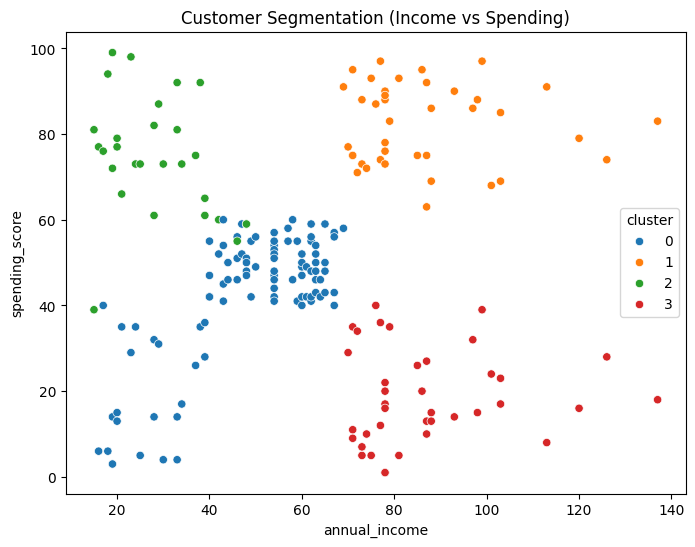

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='annual_income',
    y='spending_score',
    hue='cluster',
    palette='tab10',
    data=df
)
plt.title('Customer Segmentation (Income vs Spending)')
plt.show()


Cluster 0 :low spending, low income

Cluster 1 : high spending, high income

Cluster 2 : high spending, low income

Cluster 3 :low spending, high income

Segmen yang paling bernilai adalah pelanggan dengan pendapatan tinggi dan pengeluaran tinggi yang berpotensi menjadi pelanggan loyal premium. Sementara itu, pelanggan berpendapatan tinggi tetapi pengeluaran rendah memiliki potensi peningkatan belanja melalui strategi promosi yang tepat. Pelanggan berpendapatan rendah namun pengeluaran tinggi cenderung sensitif terhadap diskon sehingga cocok menjadi target promosi intensif. Pelanggan berpendapatan dan pengeluaran rendah memberikan kontribusi paling kecil terhadap pendapatan mall.

In [45]:
df.groupby('cluster')[['age','annual_income','spending_score']].mean()


,age,annual_income,spending_score
cluster,,,
0,44.894737,48.705263,42.631579
1,32.692308,86.538462,82.128205
2,24.821429,28.714286,74.250000
3,40.394737,87.000000,18.631579


Cluster A - “Low Value Customers”

Low income — Low spending

Ciri:

jarang belanja

sensitif harga berat

📌 Strategi bisnis:

promosi massal saja

jangan buang biaya marketing besar

Cluster B - “Premium Loyal Customers”

High income — High spending

Ciri:

- sering belanja

- pendapatan tinggi

- tidak terlalu sensitif harga

📌 Strategi bisnis:

- membership VIP

- private sale

- luxury & lifestyle product

Cluster C - “Young Impulsive Buyers”

Low income — High spending

Ciri:

- banyak usia muda

- hobi nongkrong & lifestyle

- belanja karena emosi (impulse buying)

📌 Strategi bisnis:

- diskon, bundle, buy1get1

- fashion & entertainment

- cicilan kecil

Cluster D - “Wealthy but Thrifty”

High income — Low spending

Ciri:

- kaya tapi jarang belanja

- mungkin lebih pilih online / brand lain

📌 Strategi bisnis:

- personal marketing

- cashback premium

- invite-only event


Conclusion

Proyek ini melakukan analisis dan segmentasi pelanggan pada dataset Mall Customer Segmentation. Analisis eksploratori menunjukkan bahwa kelompok usia 20–40 tahun mendominasi aktivitas belanja, dengan rata-rata spending score lebih tinggi dibandingkan kelompok usia di atas 45 tahun. Distribusi pendapatan tahunan bersifat cukup merata, namun tidak selalu berbanding lurus dengan besarnya pengeluaran, sehingga income tidak dapat dijadikan satu-satunya penentu nilai pelanggan.

Hasil korelasi antar variabel memperlihatkan bahwa hubungan antara age–spending score bersifat negatif (pelanggan yang lebih tua cenderung memiliki pengeluaran lebih rendah), sementara korelasi antara income–spending score relatif lemah, menegaskan bahwa belanja dipengaruhi oleh faktor nonfinansial seperti gaya hidup dan preferensi.

Proses segmentasi pelanggan menggunakan algoritma K-Means dengan k = 4 menghasilkan empat segmen utama, yaitu:

- Premium Loyal Customers :pendapatan tinggi – pengeluaran tinggi

- Wealthy but Thrifty : pendapatan tinggi – pengeluaran rendah

- Young Impulsive Buyers : pendapatan rendah – pengeluaran tinggi

- Low Value Customers : pendapatan rendah – pengeluaran rendah

Segmentasi ini membantu mall untuk memahami perilaku pelanggan dan merancang strategi pemasaran yang lebih tepat sasaran.

🎯 Business Recommendations

- Fokus utama diarahkan pada Premium Loyal Customers untuk program loyalti dan layanan eksklusif.

- Young Impulsive Buyers cocok ditarget melalui promosi, diskon, dan campaign lifestyle.

- Wealthy but Thrifty dapat diaktivasi melalui personalized marketing dan event khusus.

- Low Value Customers sebaiknya ditarget dengan promosi massal berbiaya rendah.

⚠️ Limitations

- Dataset kecil dan bersifat simulasi

- Tidak ada fitur perilaku seperti frekuensi kunjungan atau jenis produk

- Tidak mempertimbangkan variabel waktu (time series behavior)